### Project description
You've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.


You have:

- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018

- Dump file with all orders for the period

- Marketing expenses statistics


You are going to study:

- How people use the product

- When they start to buy

- How much money each customer brings

- When they pay off

### Step 1. Download the data and prepare it for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_visits= pd.read_csv('visits_log_us.csv',nrows=500) # download the first 500 rows from the file
data_visits.info(memory_usage='deep') # find the exact size of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [3]:
data_visits['Device'].value_counts() # find the number of unique values in the column and how they are distributed

desktop    363
touch      137
Name: Device, dtype: int64

In [4]:
#  download optimized data in the necessary formats to save memory
data_visits = pd.read_csv('visits_log_us.csv',
                          dtype={'Device': 'category'},
                          parse_dates=['Start Ts', 'End Ts']
                         )
data_visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [5]:
data_visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid'] # replace column names for lowcase and underscore
data_visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
data_visits.duplicated().sum() # check for duplicates

0

In [7]:
data_visits['source_id'].value_counts() # how source_id data structured

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [8]:
data_orders = pd.read_csv('orders_log_us.csv',nrows=500)
data_orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [9]:
data_orders = pd.read_csv('orders_log_us.csv',parse_dates=['Buy Ts'])
data_orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
data_orders.duplicated().sum()

0

In [11]:
data_orders.columns = ['buy_ts','revenue','uid']
data_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [12]:
data_costs = pd.read_csv('costs_us.csv',nrows=500)
data_costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [13]:
data_costs = pd.read_csv('costs_us.csv',parse_dates=['dt'])
data_costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [14]:
data_costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

In [15]:
data_costs.duplicated().sum()

0

In [16]:
data_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [17]:
# remove outliers, numbers are statistically insignificant for sources 6 and 7 and they are not represented in 'costs' data
data_visits = data_visits.query('source_id !=6 and source_id !=7')
data_visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
Name: source_id, dtype: int64

### Conclusion
We download the data and prepare it for the analysis.
We remove 2 outliers corresponding to sources 6 and 7 from data on visits as they are statistically insignificant (6 and 36 visits, respectively) and not represented in data on costs.

### Step 2. Make reports and calculate metrics:

Product

- How many people use it every day, week, and month?
- How many sessions are there per day? (One user might have more than one session.)
- What is the length of each session?
- How often do users come back?

Sales

- When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)
- How many orders do they make during a given period of time?
- What is the average purchase size?
- How much money do they bring? (LTV)

Marketing

- How much money was spent? Overall/per source/over time
- How much did customer acquisition from each of the sources cost?
- How worthwhile where the investments? (ROI)
- Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.


<div class="alert alert-info"> 
<b><u>PRODUCT</u></b>

<div class="alert alert-info">How many people use it every day, week, month?

In [18]:
# we check metrics for various platforms
# (this works if block "for Mobile Devices and desktops separately" is commented out)
###data_visits = data_visits.query('device=="desktop"')
###data_visits = data_visits.query('device=="touch"')
###data_visits

In [19]:
# add needed columns, find DAU, MAU
data_visits['start_ts'] = pd.to_datetime(data_visits['start_ts'])
data_visits['end_ts'] = pd.to_datetime(data_visits['end_ts'])
data_visits['session_year'] = data_visits['start_ts'].dt.year
data_visits['session_month'] = data_visits['start_ts'].dt.month
data_visits['session_week'] = data_visits['start_ts'].dt.week
data_visits['session_date'] = data_visits['start_ts'].dt.date

mau_total = data_visits.groupby(['session_year','session_month']).agg({'uid': 'nunique'}).mean()
dau_total = data_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = data_visits.groupby(['session_year','session_week']).agg({'uid': 'nunique'}).mean()

sticky_wau = dau_total/wau_total*100
sticky_mau = dau_total/mau_total*100
print('Sticky DAU:',sticky_wau)
print('Sticky MAU',sticky_mau)

<ipython-input-19-1a424eb36582>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_visits['session_week'] = data_visits['start_ts'].dt.week


Sticky DAU: uid    15.884527
dtype: float64
Sticky MAU uid    3.908985
dtype: float64


<div class="alert alert-info"> We print out DAU, WAU and MAU values.

In [20]:
print('DAU:',dau_total)
print('WAU:',wau_total)
print('MAU:',mau_total)

DAU: uid    907.884615
dtype: float64
WAU: uid    5715.528302
dtype: float64
MAU: uid    23225.583333
dtype: float64


In [21]:
# how many people use it every day, week, month

data_visits['visit_month'] = data_visits['start_ts'].astype('datetime64[M]') # add month column
data_visits['visit_date'] = data_visits['start_ts'].astype('datetime64[D]') # add day column

# add week column (week starts on Monday)
data_visits['visit_week'] = data_visits['start_ts'] - pd.to_timedelta(data_visits['start_ts'].dt.dayofweek,unit='d')
data_visits['visit_week'] = data_visits['visit_week'].astype('datetime64[D]')

data_visits.head(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,visit_month,visit_date,visit_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-20,2017-12-18
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-07-01,2017-06-26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-20,2018-05-14
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-27,2017-12-25


<div class="alert alert-info"> - How many people use it every day?

In [22]:
every_day_customers = data_visits.groupby('visit_date').agg({'uid':'nunique'})
every_day_customers.sort_values(by='uid')

,uid
visit_date,
2018-03-31,1
2018-03-30,131
2017-08-12,271
2017-08-05,280
2017-08-13,281
...,...
2018-03-26,1609
2018-02-01,1640
2017-11-25,1817


 <div class="alert alert-info"> - for Mobile Devices and Desktops separately

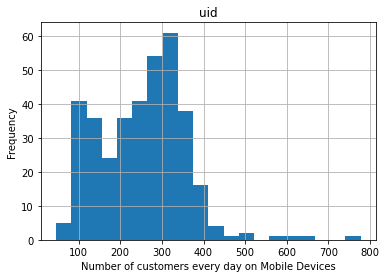

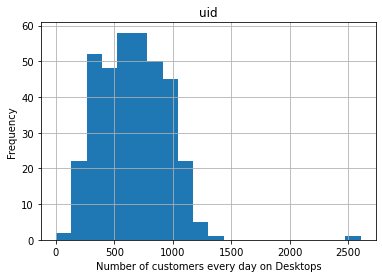

''

In [25]:
# for Mobile Devices and desktops separately

data_visits_touch = data_visits.query('device=="touch"')
data_visits_desktop = data_visits.query('device=="desktop"')
data_visits_touch.groupby('visit_date').agg({'uid':'nunique'}).hist(bins=20)
plt.xlabel('Number of customers every day on Mobile Devices')
plt.ylabel('Frequency')
plt.show()

data_visits_desktop.groupby('visit_date').agg({'uid':'nunique'}).hist(bins=20)
plt.xlabel('Number of customers every day on Desktops')
plt.ylabel('Frequency')
plt.show()
''

From histogram we can see that peak number of customers for Mobile Devices is around 350, and for Desktops peak is about 700 users. So this app is twice more popular on Desktops.

<div class="alert alert-info"> - for all Devices tougether

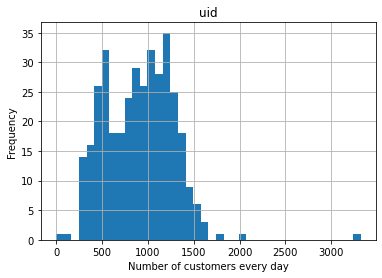

''

In [26]:
# all Devices tougether
every_day_customers = data_visits.groupby('visit_date').agg({'uid':'nunique'}).hist(bins=40)

plt.xlabel('Number of customers every day')
plt.ylabel('Frequency')
plt.show()
''

We plot distribution for number of users for every day. There are some outliers (anomalies) - 1 user for 2018-03-31 (probably incomplete data, or probably - after Good Friday https://www.calendar-12.com/calendar/2018/march/) and 3319 users for 2017-11-24 (overwhelmed due to Black Friday (Black Friday is the day following Thanksgiving Day). Distribution has peaks around 500 users and 1200 users.

<div class="alert alert-info"> - How many people use it every week?

''

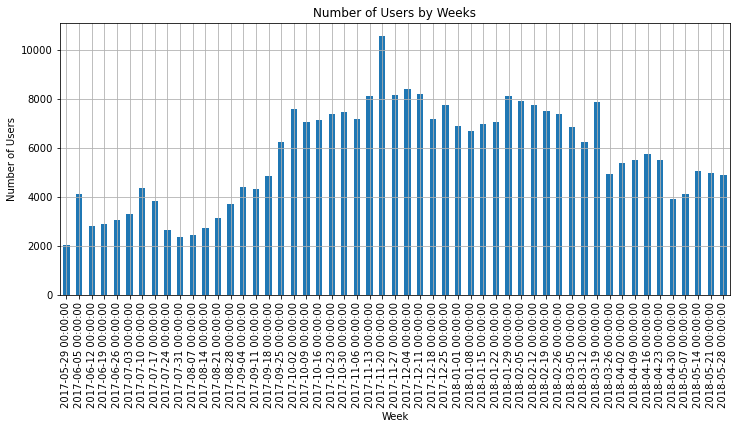

In [27]:
every_week_customers = data_visits.groupby('visit_week').agg({'uid':'nunique'})
#print(every_week_customers)
every_week_customers.sort_index().plot(title='Number of Users by Weeks',grid=True, figsize=(12,5), kind='bar',legend=False)
plt.xlabel('Week')
plt.ylabel('Number of Users')
''

We plot bar graph on Number of Users by Weeks. Graph shows gradual growth till week 2017-11-27, having peak value of 10586 users, then number of weekly users starts to decrease.

<div class="alert alert-info"> - How many people use it every month?

In [28]:
every_month_customers = data_visits.groupby('visit_month').agg({'uid':'nunique'})
every_month_customers.sort_index()

,uid
visit_month,
2017-06-01,13257
2017-07-01,14180
2017-08-01,11629
2017-09-01,18972
2017-10-01,29688
2017-11-01,32796
2017-12-01,31548
2018-01-01,28712
2018-02-01,28747


''

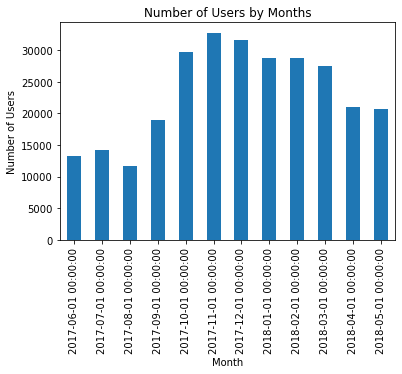

In [29]:
every_month_customers.plot(title='Number of Users by Months',kind='bar',legend=False)
plt.xlabel('Month')
plt.ylabel('Number of Users')
''

We plot number of visitors by month. There is a sharp growth from September, 2017 to December, 2017. Then in January, 2018 users number starts to decrease, generally repeating previous (weekly) graph shape. There is a peak of 32796 users during 2017-11-01 week.

<div class="alert alert-info"> How many sessions are there per day? (One user might have more than one session.)

In [30]:
# how many sessions are there per day? (One user might have more than one session.)
every_day_sessions = data_visits.groupby('visit_date')['uid'].count()
print('Average sessions per day:', every_day_sessions.mean())
every_day_sessions.sort_values()

Average sessions per day: 987.2472527472528


visit_date
2018-03-31       1
2018-03-30     134
2017-08-13     293
2017-08-12     296
2017-08-06     296
              ... 
2018-03-26    1796
2018-02-01    1878
2017-11-25    2089
2018-05-31    2255
2017-11-24    4042
Name: uid, Length: 364, dtype: int64

We find average number of sessions per day - 987 sessions.

<div class="alert alert-info"> What is the length of each session?

In [31]:
# What is the length of each session?
data_visits['session_length'] = data_visits['end_ts']-data_visits['start_ts']
data_visits.head(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,visit_month,visit_date,visit_week,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-20,2017-12-18,0 days 00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-19,2018-02-19,0 days 00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-07-01,2017-06-26,0 days 00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-20,2018-05-14,0 days 00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-27,2017-12-25,0 days 00:00:00


In [32]:
data_visits['session_length'] = data_visits['session_length']/np.timedelta64(1,'s')
data_visits['session_length'] = data_visits['session_length'].astype('int')
print(data_visits.query('session_length<0'))
print(data_visits.query('session_length<=0').count())
data_visits['session_length'].describe()

         device              end_ts  source_id            start_ts  \
4181    desktop 2018-03-25 03:18:00          3 2018-03-25 03:50:00   
177972  desktop 2018-03-25 03:09:00          9 2018-03-25 03:55:00   

                         uid  session_year  session_month  session_week  \
4181    13092152539246794986          2018              3            12   
177972   4621202742905035453          2018              3            12   

       session_date visit_month visit_date visit_week  session_length  
4181     2018-03-25  2018-03-01 2018-03-25 2018-03-19           -1920  
177972   2018-03-25  2018-03-01 2018-03-25 2018-03-19           -2760  
device            35794
end_ts            35794
source_id         35794
start_ts          35794
uid               35794
session_year      35794
session_month     35794
session_week      35794
session_date      35794
visit_month       35794
visit_date        35794
visit_week        35794
session_length    35794
dtype: int64


count    359358.000000
mean        643.017192
std         997.099656
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_length, dtype: float64

In [33]:
# drop 2 corrupted records 
data_visits = data_visits.drop(data_visits[data_visits.session_length <= 0].index) 
print(data_visits['session_length'].describe())
print('Average session length, sec:', data_visits['session_length'].mean())
data_visits['session_length'].sort_values().tail(10)

count    323564.000000
mean        714.164901
std        1026.321529
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: session_length, dtype: float64
Average session length, sec: 714.1649009160475


257551    28740
73461     29040
342154    29160
125667    30120
337996    30840
221945    31440
1197      32520
248062    32880
177381    35760
229891    42660
Name: session_length, dtype: int32

<div class="alert alert-info"> Session Lenght for Desktops and Mobile Devices.

Average Session Length for Desktop, sec: 773.05306392457
Average Session Length for Mobile Devices, sec: 240.0


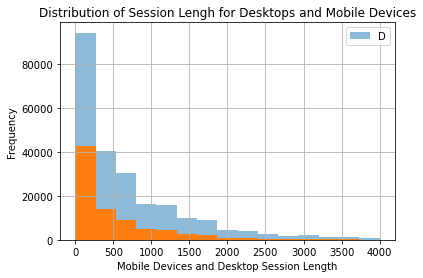

''

In [34]:
# Session Lenght for Desktops and Mobile Devices

touch_session_length = data_visits.query('device=="touch"')
desktop_session_length = data_visits.query('device=="desktop"')

print('Average Session Length for Desktop, sec:', desktop_session_length['session_length'].mean())
print('Average Session Length for Mobile Devices, sec:', touch_session_length['session_length'].median())

desktop_session_length['session_length'].hist(bins=15,alpha=0.5, range=(1,4000)).legend('D')
touch_session_length['session_length'].hist(bins=15, range=(1,4000)).set_title(
    "Distribution of Session Lengh for Desktops and Mobile Devices")
plt.xlabel('Mobile Devices and Desktop Session Length')
plt.ylabel('Frequency')
plt.show()
''

Distributions of Session Length for Mobile Devices and Desktops are generally same. However we can see slightly bigger proportion of Sessions durations around 500 sec for Desktops, then ones for Mobile Devices. Average Session Length for Desktop (773 sec) is about 3 times longer than one for Mobile Devices (240 sec). It looks like users found it more convenient  to use the app on Desktop rather than on Mobile Device. That could probably mean the Mobile Version has a room for improvement.

Average Session Length, sec: 714.1649009160475
Median Session Length, sec: 360.0


''

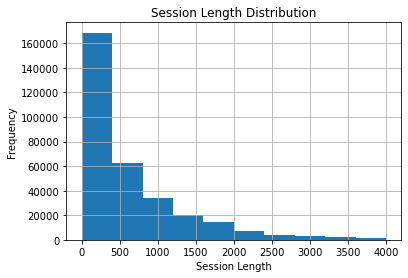

In [35]:
print('Average Session Length, sec:', data_visits['session_length'].mean())
print('Median Session Length, sec:', data_visits['session_length'].median())
data_visits['session_length'].hist(bins=10, range=(1,4000)).set_title('Session Length Distribution')
plt.xlabel('Session Length')
plt.ylabel('Frequency')
''

We plot Session Length distribution for all devices. 75% of sessions are under 900 sec, 50% - under 360sec, 25% - under 120sec. Mean session length is 714 sec, median is 360 sec. There are some outliers up to 42660 sec. There are also 35794 records with zero length values.

<div class="alert alert-info"> How often do users come back?

In [36]:
# how often do users come back?

first_activity_date = data_visits.groupby(['uid'])['start_ts'].min().astype('datetime64[D]')
first_activity_date.name = 'first_activity_date'
data_visits = data_visits.join(first_activity_date,on='uid')

data_visits['activity_week'] = (pd.to_datetime(data_visits['visit_date'], unit='d') - pd
                                .to_timedelta(data_visits['visit_date'].dt.dayofweek, unit='d')
)
data_visits['first_activity_week'] = (pd.to_datetime(data_visits['first_activity_date'], unit='d') - pd
                                      .to_timedelta(data_visits['first_activity_date'].dt.dayofweek, unit='d')
)                                      
data_visits['cohort_lifetime'] = data_visits['activity_week'] - data_visits['first_activity_week']
data_visits['cohort_lifetime'] = data_visits['cohort_lifetime'] / np.timedelta64(1,'W')
data_visits['cohort_lifetime'] = data_visits['cohort_lifetime'].astype(int)
cohorts =(
    data_visits.groupby(['first_activity_week','cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
)  # build the data frame with cohorts
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_week', 'uid']] # build the data frame 
initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_activity_week')  # join the data frames cohorts and initital_users_count
cohorts['retention'] =  cohorts['uid'] / cohorts['cohort_users'] # calculate retention rate
retention_pivot = cohorts.pivot_table(
    index='first_activity_week',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) # compile pivot table

retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
first_activity_week,,,,,,,,,,,,,,,,,,,,,
2017-05-29,1.0,0.091410,0.049009,0.034141,0.044053,0.039648,0.037445,0.035242,0.029185,0.023678,...,0.028084,0.019824,0.027533,0.028634,0.029736,0.022026,0.023128,0.028634,0.031388,0.022577
2017-06-05,1.0,0.036513,0.026606,0.022644,0.022078,0.022078,0.021511,0.017549,0.014152,0.016417,...,0.015284,0.013586,0.015851,0.013020,0.011888,0.012737,0.019530,0.017266,0.012737,NaN
2017-06-12,1.0,0.038763,0.026568,0.021341,0.022648,0.017857,0.015679,0.016115,0.012195,0.018728,...,0.013066,0.011324,0.011324,0.010017,0.010889,0.009146,0.013066,0.007404,NaN,NaN
2017-06-19,1.0,0.033204,0.026304,0.023286,0.023286,0.013799,0.012937,0.007331,0.010349,0.012937,...,0.012074,0.008193,0.009487,0.007331,0.008624,0.009918,0.007331,NaN,NaN,NaN
2017-06-26,1.0,0.038287,0.025937,0.018938,0.014409,0.010704,0.011116,0.009469,0.012762,0.013998,...,0.007410,0.004940,0.005764,0.008646,0.010292,0.010292,NaN,NaN,NaN,NaN
2017-07-03,1.0,0.043931,0.030058,0.021580,0.014258,0.013873,0.013102,0.010019,0.012717,0.014644,...,0.003083,0.005395,0.006551,0.005010,0.008863,NaN,NaN,NaN,NaN,NaN
2017-07-10,1.0,0.038294,0.017406,0.013345,0.010734,0.011894,0.011894,0.011314,0.014215,0.012765,...,0.006092,0.008413,0.009574,0.008993,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-17,1.0,0.031135,0.022096,0.014730,0.016404,0.013391,0.014061,0.016070,0.014730,0.015065,...,0.009374,0.006696,0.006361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-24,1.0,0.023882,0.017276,0.019817,0.014228,0.017276,0.019817,0.015244,0.015244,0.012195,...,0.004573,0.005589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


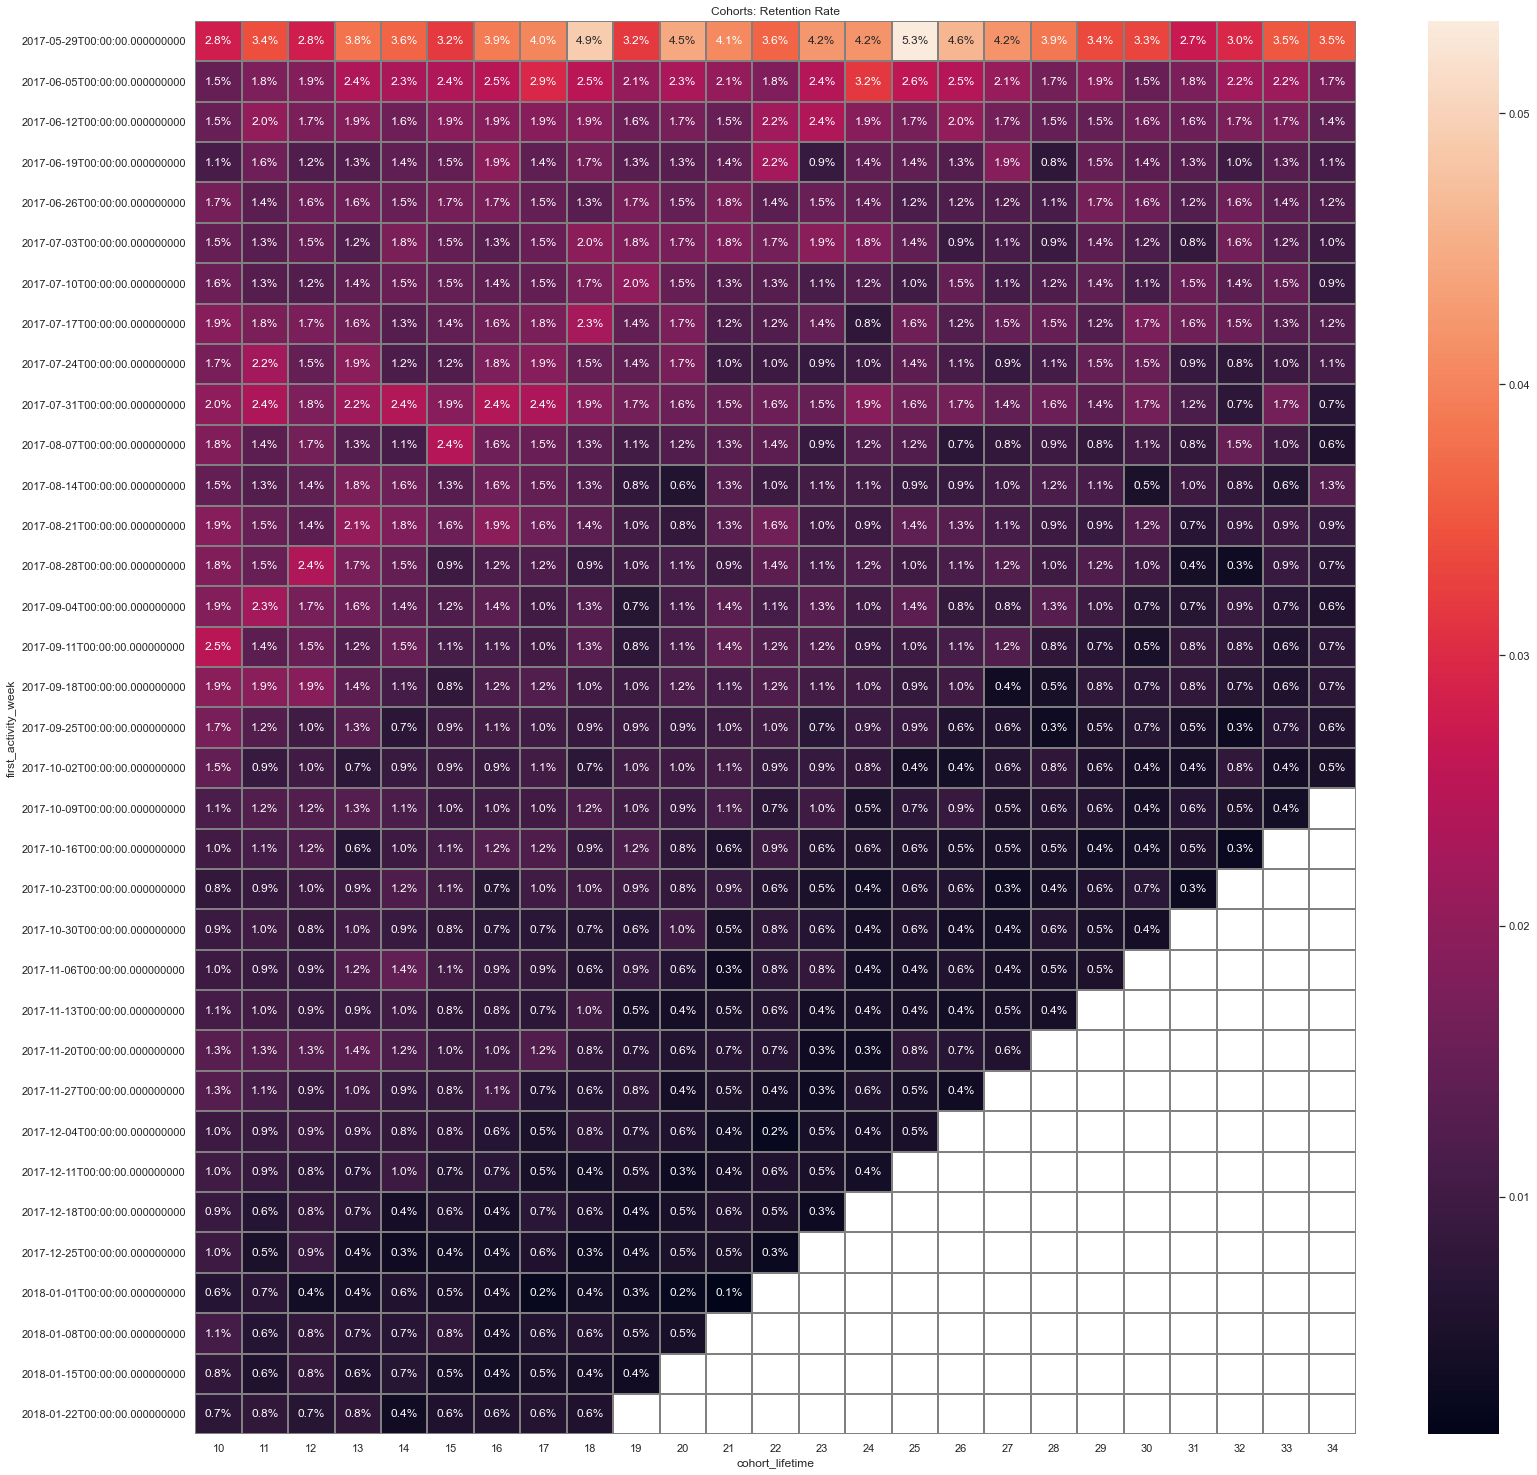

In [37]:
sns.set(style='white')
plt.figure(figsize=(26, 26))
plt.title('Cohorts: Retention Rate')
sns.heatmap(retention_pivot.iloc[0:35,10:35], annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

We find the retention rate and build a partial heatmap. It's highest for the first cohort (2017-05-29) and even grows from time to time. In general, users come back not too often.

<div class="alert alert-info"> Let's construct monthly cohorts against weekly ones.

In [38]:
# let's calculate Retention Rate by month
first_activity_m = data_visits.groupby(['uid'])['start_ts'].min().astype('datetime64[M]')
first_activity_m.name = 'first_activity_m'
#print(first_activity_m)
data_visits = pd.merge(first_activity_m,data_visits,on='uid')
data_visits['activity_m'] = pd.to_datetime(data_visits['visit_date'], unit='M')
#print(data_visits['first_activity_m'])

data_visits['cohort_lifetime_m'] = data_visits['activity_m'] - data_visits['first_activity_m']
data_visits['cohort_lifetime_m'] = data_visits['cohort_lifetime_m'] / np.timedelta64(1,'M')
data_visits['cohort_lifetime_m'] = data_visits['cohort_lifetime_m'].astype(int)
#print(data_visits['cohort_lifetime_m'])

cohorts_m =(
    data_visits.groupby(['first_activity_m','cohort_lifetime_m'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
initial_users_count_m = cohorts_m[cohorts_m['cohort_lifetime_m'] == 0][
    ['first_activity_m', 'uid']] # build the data frame 
initial_users_count_m = initial_users_count_m.rename(
    columns={'uid': 'cohort_users_m'})

cohorts_m = cohorts_m.merge(initial_users_count_m, on='first_activity_m')  # join the data frames cohorts and initital_users_count
cohorts_m['retention_m'] =  cohorts_m['uid'] / cohorts_m['cohort_users_m'] # calculate retention rate

# compile pivot table
retention_pivot_m = cohorts_m.pivot_table(
    index='first_activity_m',
    columns='cohort_lifetime_m',
    values='retention_m',
    aggfunc='sum',
)

retention_pivot_m

cohort_lifetime_m,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_m,,,,,,,,,,,,
2017-06-01,1.0,0.073466,0.050913,0.059749,0.065388,0.067491,0.057730,0.055121,0.052764,0.048725,0.039047,0.043171
2017-07-01,1.0,0.053121,0.052191,0.054136,0.058450,0.045762,0.043817,0.046777,0.036373,0.027745,0.026561,NaN
2017-08-01,1.0,0.074351,0.060458,0.060458,0.047976,0.040595,0.039835,0.034408,0.027570,0.024205,NaN,NaN
2017-09-01,1.0,0.079746,0.068902,0.048139,0.038088,0.039278,0.032996,0.023210,0.022019,NaN,NaN,NaN
2017-10-01,1.0,0.078142,0.050820,0.036713,0.037393,0.028937,0.021373,0.019079,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.073760,0.042735,0.039717,0.031266,0.022132,0.019597,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.053256,0.039616,0.028148,0.020069,0.017115,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.060574,0.035440,0.023918,0.018668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.048976,0.024885,0.017746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


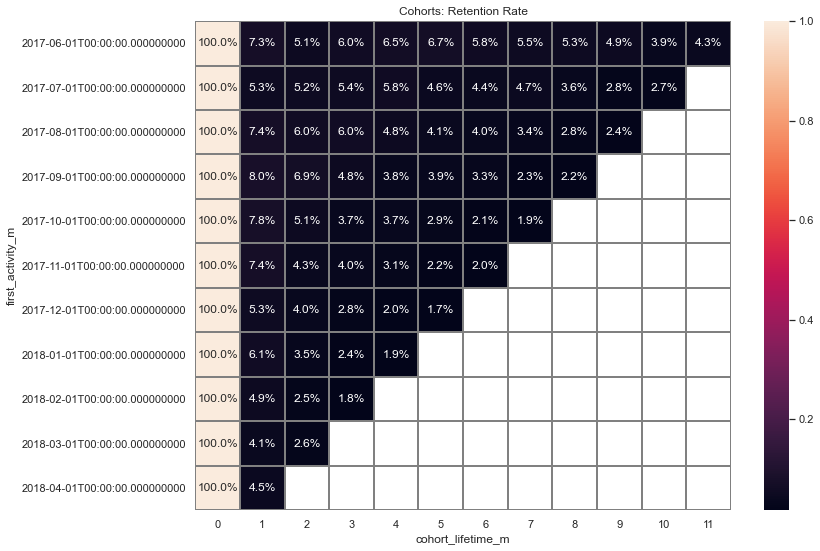

In [39]:
sns.set(style='white')
plt.figure(figsize=(12, 9))
plt.title('Cohorts: Retention Rate')
sns.heatmap(retention_pivot_m.iloc[0:11,0:12], annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

We can see from the monthly heatmap that users does not return often.

<div class="alert alert-info"> 
<b><u>SALES</u></b>

Sales

- When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

- How many orders do they make during a given period of time?

- What is the average purchase size?

- How much money do they bring? (LTV)

In [40]:
data_orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<div class="alert alert-info">When do people start buying?

In [41]:
# first order date

data_orders['buy_date'] = data_orders['buy_ts'].astype('datetime64[D]')

first_orders = data_orders.groupby('uid').agg({'buy_date': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_date']

cohort_sizes = first_orders.groupby('first_order_date').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_date', 'n_buyers']
print(cohort_sizes)

first_activity_date1 = data_visits.groupby(['uid'])['start_ts'].min().astype('datetime64[D]')
first_activity_date1.name = 'first_activity_date'
print(first_activity_date1)

first_orders = first_orders.join(first_activity_date1,how='inner',on='uid')
first_orders
#data_visits_orders

    first_order_date  n_buyers
0         2017-06-01        86
1         2017-06-02        97
2         2017-06-03        57
3         2017-06-04        55
4         2017-06-05       141
..               ...       ...
359       2018-05-28       129
360       2018-05-29       128
361       2018-05-30       146
362       2018-05-31       492
363       2018-06-01         1

[364 rows x 2 columns]
uid
11863502262781         2018-03-01
49537067089222         2018-02-06
297729379853735        2017-06-07
313578113262317        2017-09-18
325320750514679        2017-09-30
                          ...    
18446316582013423015   2018-02-26
18446403737806311543   2017-11-30
18446556406699109058   2018-01-01
18446621818809592527   2017-12-27
18446676030785672386   2017-10-04
Name: first_activity_date, Length: 207022, dtype: datetime64[ns]


,uid,first_order_date,first_activity_date
0,313578113262317,2018-01-03,2017-09-18
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-28,2018-01-27
4,2551852515556206,2017-11-24,2017-11-24
...,...,...,...
36517,18442290965339407211,2018-02-05,2018-02-05
36519,18445407535914413204,2017-09-22,2017-09-22
36520,18445601152732270159,2018-03-26,2017-08-07
36521,18446156210226471712,2018-02-18,2017-11-07


In [42]:
first_orders['first_order_date'].describe()

<ipython-input-42-67590c6c8da0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  first_orders['first_order_date'].describe()


count                   36080
unique                    364
top       2017-11-24 00:00:00
freq                      591
first     2017-06-01 00:00:00
last      2018-06-01 00:00:00
Name: first_order_date, dtype: object

There are 36080 first orders for a given time (from 2017-06-01 to 2018-06-01).

''

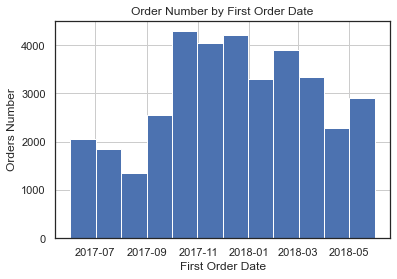

In [43]:
first_orders['first_order_date'].hist(bins=12).set_title('Order Number by First Order Date')
plt.xlabel('First Order Date')
plt.ylabel('Orders Number')
''

First orders distribution by dates shows some seasonality. We can see increasing number of orders around November and December.

<div class="alert alert-info">Which cohort is most effective?

In [44]:
first_orders['cohort'] = (first_orders['first_order_date'] - first_orders['first_activity_date'])/np.timedelta64(1,'D')
first_orders['cohort'] = first_orders['cohort'].astype('int')

#first_orders1 = first_orders.query('cohort<0')
first_orders

,uid,first_order_date,first_activity_date,cohort
0,313578113262317,2018-01-03,2017-09-18,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-28,2018-01-27,1
4,2551852515556206,2017-11-24,2017-11-24,0
...,...,...,...,...
36517,18442290965339407211,2018-02-05,2018-02-05,0
36519,18445407535914413204,2017-09-22,2017-09-22,0
36520,18445601152732270159,2018-03-26,2017-08-07,231
36521,18446156210226471712,2018-02-18,2017-11-07,103


In [45]:
first_orders = first_orders.drop(first_orders[first_orders.cohort < 0].index) # drop corrupted records
first_orders

,uid,first_order_date,first_activity_date,cohort
0,313578113262317,2018-01-03,2017-09-18,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-28,2018-01-27,1
4,2551852515556206,2017-11-24,2017-11-24,0
...,...,...,...,...
36517,18442290965339407211,2018-02-05,2018-02-05,0
36519,18445407535914413204,2017-09-22,2017-09-22,0
36520,18445601152732270159,2018-03-26,2017-08-07,231
36521,18446156210226471712,2018-02-18,2017-11-07,103


If we assume that registration supposed to come before order, than 145 records are corrupted and needed to drop. If somehow order is possible without any preceding activity, than these records could make sense. Before we get additional info, we disregard these records.

In [46]:
first_orders['cohort'].describe()

count    35935.000000
mean        15.714958
std         45.410316
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        363.000000
Name: cohort, dtype: float64

In [47]:
cohort_sizes = first_orders.groupby('cohort').agg({'uid':'nunique'}).reset_index() # cohort sizes
cohort_sizes.head(20)

,cohort,uid
0,0,25197
1,1,1893
2,2,644
3,3,429
4,4,367
5,5,288
6,6,255
7,7,229
8,8,204
9,9,152


For at least 70% of users the registration and the first purchase occur on the same day, another 5% of users order the next day. Within first 16 days 84% (30322) of all users have already made their first order.

''

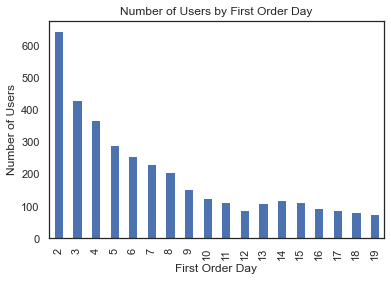

In [48]:
cohort_sizes1 = cohort_sizes.query('1<cohort<20') # remove outliers and non-representative statistically small
cohort_sizes1['uid'].plot(kind='bar',title='Number of Users by First Order Day')
plt.xlabel('First Order Day')
plt.ylabel('Number of Users')
''

We plot bar graph for orders by cohorts for the first 19 days (except Cohort0=25197 users - Conversion 0d and Cohort1=1893 users - Conversion 1d). The number of users making purchases decreases with time passed after first activity. Majority of users are making their first order on the registration day (25197 users) and next day (1893 user).

In [49]:
first_orders.sort_values(by='uid')

,uid,first_order_date,first_activity_date,cohort
0,313578113262317,2018-01-03,2017-09-18,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-28,2018-01-27,1
4,2551852515556206,2017-11-24,2017-11-24,0
...,...,...,...,...
36517,18442290965339407211,2018-02-05,2018-02-05,0
36519,18445407535914413204,2017-09-22,2017-09-22,0
36520,18445601152732270159,2018-03-26,2017-08-07,231
36521,18446156210226471712,2018-02-18,2017-11-07,103


<div class="alert alert-info">Which marketing channel is most effective?

In [50]:
# join source_id info to orders info
data_visits1 = data_visits.groupby(['uid'])['source_id'].first()
first_orders = first_orders.join(data_visits1,how='inner',on='uid')
first_orders

,uid,first_order_date,first_activity_date,cohort,source_id
0,313578113262317,2018-01-03,2017-09-18,107,2
1,1575281904278712,2017-06-03,2017-06-03,0,10
2,2429014661409475,2017-10-11,2017-10-11,0,3
3,2464366381792757,2018-01-28,2018-01-27,1,5
4,2551852515556206,2017-11-24,2017-11-24,0,5
...,...,...,...,...,...
36517,18442290965339407211,2018-02-05,2018-02-05,0,3
36519,18445407535914413204,2017-09-22,2017-09-22,0,3
36520,18445601152732270159,2018-03-26,2017-08-07,231,2
36521,18446156210226471712,2018-02-18,2017-11-07,103,3


In [51]:
# by platforms visits
data_visits_device_desktop = data_visits.query('device=="desktop"')
print(data_visits_device_desktop.shape)
data_visits_device_touch = data_visits.query('device=="touch"')
print(data_visits_device_touch.shape)

(238844, 20)
(84720, 20)


In [52]:
# plot pivot table on which cohort, or marketing channel, is most effective
first_orders11 = first_orders.query('cohort< 20').reset_index() # remove too big elapse time
first_orders_pivot = first_orders11.pivot_table(index='cohort',columns='source_id',values='uid',aggfunc='count',fill_value=0)
first_orders_pivot

source_id,1,2,3,4,5,9,10
cohort,,,,,,,
0,2475,2582,6564,6813,5099,741,923
1,301,260,444,462,300,60,66
2,95,91,140,161,109,23,25
3,66,64,106,105,61,16,11
4,48,60,69,117,47,12,14
5,46,36,61,87,42,11,5
6,30,46,52,65,39,14,9
7,28,35,44,60,43,14,5
8,22,29,48,47,33,11,14


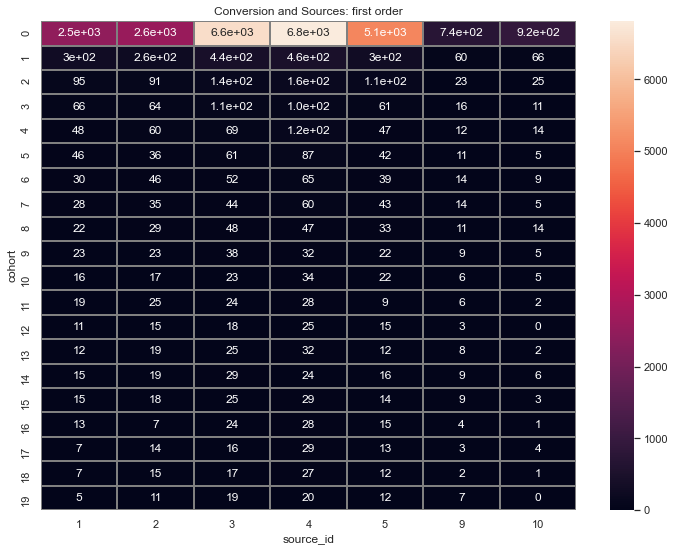

In [79]:
# heatmap
sns.set(style='white')
plt.figure(figsize=(12, 9))
plt.title('Conversion and Sources: first order')
sns.heatmap(first_orders_pivot, annot=True, linewidths=1, linecolor='gray'); 

From pivot table and Heatmap on First Order by Cohort and Source we can see that most same day orders come from Sources 4, 3 and 5. Then go Sources 2, 1, 10 and 9. For the next day orders leaders are the same. Sources 4, 3 and 5 actually keep leading throughout the rest elapse times. So Sources 4, 3 and 5 look most effective prior evaluating costs involved.

In [54]:
# all orders
all_orders = data_orders.groupby(['uid']).agg({'buy_ts':'count','revenue':'sum'}).reset_index()
all_orders = all_orders.drop_duplicates()

first_orders = first_orders.reset_index()
all_orders1 = pd.merge(all_orders,first_orders, on='uid')
#print(all_orders1)

<div class="alert alert-info">How many orders do they make during a given period of time?

In [55]:
# how many orders do they make during a given period of time?
sources_orders = (
    all_orders1.pivot_table(index='cohort',columns='source_id',values='buy_ts',aggfunc='count',fill_value=0, margins=True)
    .sort_values('All', ascending=False)
)
sources_orders

source_id,1,2,3,4,5,9,10,All
cohort,,,,,,,,
All,3748,4220,8986,9666,6737,1355,1223,35935
0,2475,2582,6564,6813,5099,741,923,25197
1,301,260,444,462,300,60,66,1893
2,95,91,140,161,109,23,25,644
3,66,64,106,105,61,16,11,429
...,...,...,...,...,...,...,...,...
317,0,1,0,0,0,0,0,1
307,0,0,0,0,0,1,0,1
314,0,0,0,1,0,0,0,1


<div class="alert alert-info">Time series graph showing how number of orders changes by time.

''

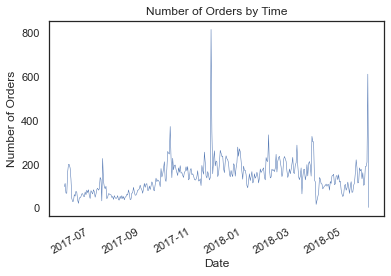

In [56]:
# prepare time series graph
data_orders_t = data_orders.copy()
data_orders_t = data_orders_t.set_index('buy_date')

data_orders_t = data_orders_t.groupby(['buy_date']).agg({'revenue':'count'},as_index=True)

data_orders_t['revenue'].plot(linewidth=0.5,title='Number of Orders by Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
''

<div class="alert alert-info">What is the average purchase size?

In [57]:
#  what is the average purchase size by cohorts by sources
sources_revenue_mean = (
    all_orders1.pivot_table(
        index='cohort',columns='source_id',values='revenue',aggfunc='mean',fill_value=0,margins=True)
)
sources_revenue_mean

source_id,1,2,3,4,5,9,10,All
cohort,,,,,,,,
0,7.066913,12.797800,4.503608,4.761525,5.690943,4.702982,3.094930,5.869593
1,9.564252,11.015462,4.968761,5.585628,10.893533,4.100667,4.092121,7.561400
2,25.725684,4.639780,4.715357,5.386335,5.700092,4.674783,2.076000,8.034534
3,5.499091,18.478437,4.946509,5.617524,5.175410,6.071875,4.710000,7.282960
4,24.487500,31.028167,4.662464,5.691538,4.652979,3.005833,4.448571,11.830381
...,...,...,...,...,...,...,...,...
355,0.850000,0.000000,0.000000,3.970000,0.000000,0.000000,0.000000,2.410000
357,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.580000,0.466667
358,0.000000,0.000000,5.320000,0.000000,0.000000,0.000000,0.000000,5.320000


<div class="alert alert-info">Calculate average purchase size for all sources and plot a time series.

''

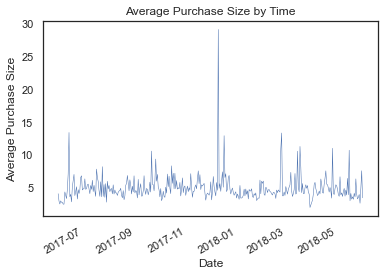

In [58]:
# average purchase size for all sources
data_orders_t1 = data_orders.copy()
data_orders_t1 = data_orders_t1.set_index('buy_date')

data_orders_t1 = data_orders_t1.groupby(['buy_date']).agg({'revenue':'mean'},as_index=True)
# plot a time series
data_orders_t1['revenue'].plot(linewidth=0.5,title='Average Purchase Size by Time')
plt.xlabel('Date')
plt.ylabel('Average Purchase Size')
''

In [59]:
# total revenue by cohorts by sources
sources_revenue = (
    all_orders1.pivot_table(index='cohort',columns='source_id',values='revenue',aggfunc='sum',fill_value=0, margins=True)
    .sort_values('All', ascending=False)
)
sources_revenue.head(10)

source_id,1,2,3,4,5,9,10,All
cohort,,,,,,,,
All,37800.30,64975.28,43337.43,50661.16,39729.10,6714.24,4041.36,247258.87
0,17490.61,33043.92,29561.68,32440.27,29018.12,3484.91,2856.62,147896.13
1,2878.84,2864.02,2206.13,2580.56,3268.06,246.04,270.08,14313.73
13,59.69,12032.02,104.72,178.28,143.47,61.28,10.38,12589.84
2,2443.94,422.22,660.15,867.20,621.31,107.52,51.90,5174.24
4,1175.40,1861.69,321.71,665.91,218.69,36.07,62.28,4341.75
3,362.94,1182.62,524.33,589.84,315.70,97.15,51.81,3124.39
6,719.01,481.94,403.98,307.07,307.38,62.89,29.84,2312.11
5,537.07,146.98,324.50,773.58,201.23,63.69,31.86,2078.91


<div class="alert alert-info">How much money do they bring? (LTV)

In [60]:
# how much money do they bring? (LTV)

data_orders['order_month'] = data_orders['buy_ts'].astype('datetime64[M]')
data_costs['month'] = data_costs['dt'].astype('datetime64[M]')

first_orders_monthly = data_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_monthly.columns = ['uid', 'first_order_monthly']

cohort_sizes_monthly = first_orders_monthly.groupby('first_order_monthly').agg({'uid': 'nunique'}).reset_index()
cohort_sizes_monthly.columns = ['first_order_monthly', 'n_buyers_monthly']
cohort_sizes_monthly.head()

margin_rate = 1

data_orders_ = pd.merge(data_orders,first_orders_monthly, on='uid')
cohorts_monthly = data_orders_.groupby(['first_order_monthly','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes_monthly, cohorts_monthly, on='first_order_monthly')

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_monthly']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers_monthly']


monthly_costs = data_costs.groupby('month').sum()
report_ = pd.merge(report, monthly_costs, left_on='first_order_monthly', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers_monthly']

result = report_.pivot_table(
index='first_order_monthly',
columns='age',
values='ltv',
aggfunc='mean') # calculate the pivot table with LTV

# find the cumulative LTV for 11 months from the moment the first order was made
m11_cum_ltv = result.cumsum(axis=1).mean(axis=0).round(1) 

print('Average LTV for 11 months from the first order:')
print(m11_cum_ltv)
#result

Average LTV for 11 months from the first order:
age
0      4.9
1      5.4
2      5.8
3      6.7
4      7.3
5      8.0
6      8.4
7      9.1
8     10.1
9      9.3
10    10.0
11    11.9
dtype: float64


<div class="alert alert-info">Plot a graph to visualize results about LTV.

''

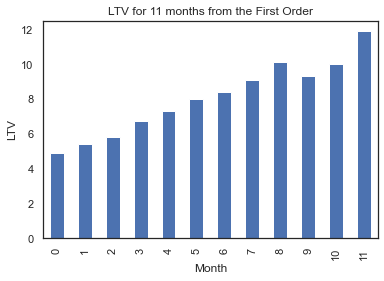

In [61]:
m11_cum_ltv.plot(kind='bar',title='LTV for 11 months from the First Order')
plt.xlabel('Month')
plt.ylabel('LTV')
''

Average LTV increases with the age of cohort from about 5 to about 12. As margin rate is not provided, we apply 1, assuming gross profit is equal to revenue. As soon as actual margin rate will be available our metrics could be easily recalculated. 

<div class="alert alert-info"> 
<b><u>MARKETING</u></b>

Marketing

- How much money was spent? Overall/per source/over time

- How much did customer acquisition from each of the sources cost?

- How worthwhile where the investments? (ROI)

- Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

In [62]:
data_costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


<div class="alert alert-info">How much money was spent? Overall/per source/over time

In [63]:
# how much money was spent? Overall/per source/over time
overall_costs = data_costs['costs'].sum()
print('Overall Costs',overall_costs)

Overall Costs 329131.62


In [64]:
# per Source
data_costs1 = data_costs.groupby(['source_id'])['costs'].sum()
data_costs1

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

<div class="alert alert-info">Plot a bar chart for costs by sources.

''

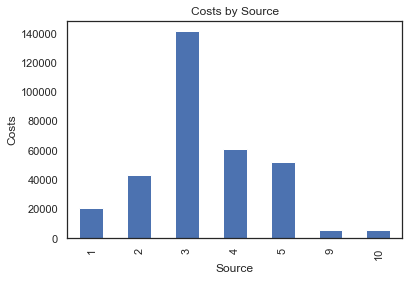

In [65]:
# plot a bar chart for costs by sources
data_costs1.plot(kind='bar',title='Costs by Source')
plt.xlabel('Source')
plt.ylabel('Costs')
''

On the bar graph Source 3 looks like outlier.

In [66]:
# over time
costs_days_sources = data_costs.pivot_table(index= 'dt',columns='source_id', values='costs',aggfunc='sum',margins=True)
costs_days_sources

source_id,1,2,3,4,5,9,10,All
dt,,,,,,,,
2017-06-01 00:00:00,75.20,132.56,349.38,76.74,73.24,13.06,15.08,735.26
2017-06-02 00:00:00,62.25,132.38,314.22,59.21,123.82,18.13,11.18,721.19
2017-06-03 00:00:00,36.53,77.20,196.12,59.39,64.93,7.06,9.62,450.85
2017-06-04 00:00:00,55.00,79.08,389.87,161.97,52.77,4.65,17.82,761.16
2017-06-05 00:00:00,57.08,108.96,424.47,44.65,144.30,15.30,26.68,821.44
...,...,...,...,...,...,...,...,...
2018-05-28 00:00:00,54.47,82.67,247.92,68.88,131.77,12.47,21.26,619.44
2018-05-29 00:00:00,61.13,105.75,347.59,103.84,138.33,16.83,11.32,784.79
2018-05-30 00:00:00,130.47,119.26,611.78,18.01,246.76,23.57,33.15,1183.00


In [67]:
#print(data_orders)
data_orders111 = pd.merge(data_orders,all_orders1,on='uid')
#data_orders111

In [68]:
# all orders by sources by dates
orders_days_sources=data_orders111.pivot_table(index= 'buy_date',columns='source_id', values='uid',aggfunc='count',margins=True)
orders_days_sources

source_id,1,2,3,4,5,9,10,All
buy_date,,,,,,,,
2017-06-01 00:00:00,12.0,19.0,28.0,10.0,19.0,6.0,2.0,96
2017-06-02 00:00:00,8.0,12.0,30.0,32.0,19.0,7.0,3.0,111
2017-06-03 00:00:00,10.0,11.0,14.0,12.0,10.0,NaN,7.0,64
2017-06-04 00:00:00,5.0,8.0,17.0,13.0,13.0,5.0,3.0,64
2017-06-05 00:00:00,21.0,28.0,51.0,25.0,18.0,10.0,5.0,158
...,...,...,...,...,...,...,...,...
2018-05-29 00:00:00,21.0,22.0,53.0,36.0,38.0,10.0,8.0,188
2018-05-30 00:00:00,26.0,34.0,61.0,33.0,42.0,3.0,6.0,205
2018-05-31 00:00:00,87.0,217.0,119.0,86.0,42.0,9.0,38.0,598


<div class="alert alert-info">Plot a time series for all costs by source and by time.

''

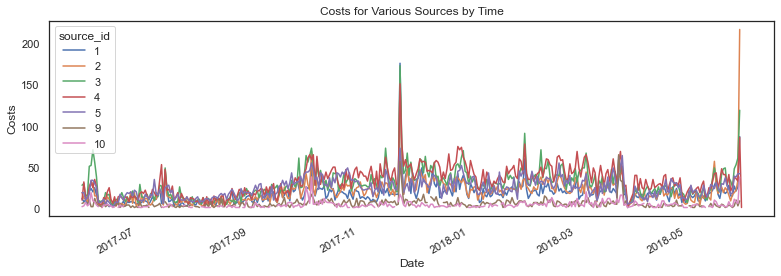

In [91]:
# plot a time series for all costs by source and by time

orders_days_sources1=data_orders111.pivot_table(
    index= 'buy_date',columns='source_id', values='uid',aggfunc='count')

orders_days_sources1.plot(title='Costs for Various Sources by Time',figsize=(13, 4))
plt.xlabel('Date')
plt.ylabel('Costs')
''

Plot for all Sources is not very well readable (that's why we plot additional one below for Sources 1, 4 and 10), but we still can see that peaks of costs mostly aligned for different Sources.

''

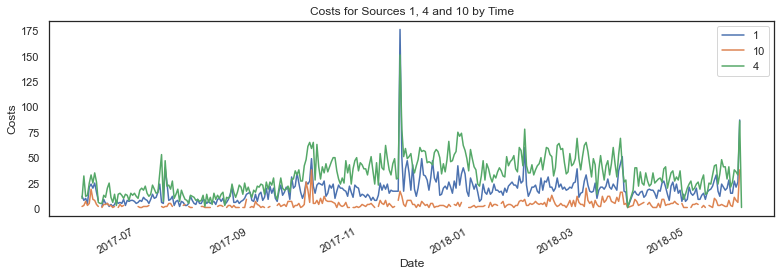

In [90]:
# one more
orders_days_sources1[1].plot(title='Costs for Sources 1, 4 and 10 by Time')
orders_days_sources1[10].plot(figsize=(13, 4))
orders_days_sources1[4].plot()
plt.xlabel('Date')
plt.ylabel('Costs')
plt.legend()
''

<div class="alert alert-info"> How much did customer acquisition from each of the sources cost?

In [71]:
# CAC for each source for each day for all orders
depos_cost = costs_days_sources/orders_days_sources
depos_cost

source_id,1,2,3,4,5,9,10,All
2017-06-01 00:00:00,6.266667,6.976842,12.477857,7.674000,3.854737,2.176667,7.540000,7.658958
2017-06-02 00:00:00,7.781250,11.031667,10.474000,1.850313,6.516842,2.590000,3.726667,6.497207
2017-06-03 00:00:00,3.653000,7.018182,14.008571,4.949167,6.493000,NaN,1.374286,7.044531
2017-06-04 00:00:00,11.000000,9.885000,22.933529,12.459231,4.059231,0.930000,5.940000,11.893125
2017-06-05 00:00:00,2.718095,3.891429,8.322941,1.786000,8.016667,1.530000,5.336000,5.198987
...,...,...,...,...,...,...,...,...
2018-05-29 00:00:00,2.910952,4.806818,6.558302,2.884444,3.640263,1.683000,1.415000,4.174415
2018-05-30 00:00:00,5.018077,3.507647,10.029180,0.545758,5.875238,7.856667,5.525000,5.770732
2018-05-31 00:00:00,1.628736,1.171198,6.910084,5.727209,9.477143,3.041111,0.463158,3.601505
2018-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# CAC for each source for each day for the first orders
first_orders_days_sources = first_orders.pivot_table(index= 'first_order_date',columns='source_id', values='uid',aggfunc='count',margins=True)
first_orders_days_sources
depos_cost_first = costs_days_sources/first_orders_days_sources
depos_cost_first

source_id,1,2,3,4,5,9,10,All
2017-06-01 00:00:00,6.266667,7.797647,12.940000,8.526667,4.882667,3.265000,7.540000,8.549535
2017-06-02 00:00:00,10.375000,11.031667,12.568800,2.041724,7.738750,2.590000,5.590000,7.434948
2017-06-03 00:00:00,5.218571,8.577778,15.086154,5.399091,7.214444,NaN,1.603333,8.197273
2017-06-04 00:00:00,18.333333,9.885000,25.991333,12.459231,5.277000,1.550000,8.910000,14.095556
2017-06-05 00:00:00,3.805333,4.737391,9.031277,1.860417,9.620000,1.530000,5.336000,5.909640
...,...,...,...,...,...,...,...,...
2018-05-29 00:00:00,4.366429,8.134615,10.223235,4.514783,4.322813,2.805000,2.264000,6.179449
2018-05-30 00:00:00,8.698000,4.969167,13.595111,0.667037,9.139259,11.785000,6.630000,8.158621
2018-05-31 00:00:00,2.361667,1.419832,7.906731,6.937183,12.438750,5.474000,0.550000,4.459006
2018-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Customer acquisition cost by monthly cohorts 
result_cac_monthly = report_.pivot_table(
index='first_order_monthly',
columns='age',
values='cac',
aggfunc='mean')
result_cac_monthly

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_monthly,,,,,,,,,,,,
2017-06-01,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091,8.905091
2017-07-01,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,9.485486,NaN
2017-08-01,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,10.796015,NaN,NaN
2017-09-01,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,9.441654,NaN,NaN,NaN
2017-10-01,8.369327,8.369327,8.369327,8.369327,8.369327,8.369327,8.369327,8.369327,NaN,NaN,NaN,NaN
2017-11-01,9.288870,9.288870,9.288870,9.288870,9.288870,9.288870,9.288870,NaN,NaN,NaN,NaN,NaN
2017-12-01,8.741809,8.741809,8.741809,8.741809,8.741809,8.741809,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,9.937302,9.937302,9.937302,9.937302,9.937302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,8.962758,8.962758,8.962758,8.962758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-info"> Plot a heatmap.

''

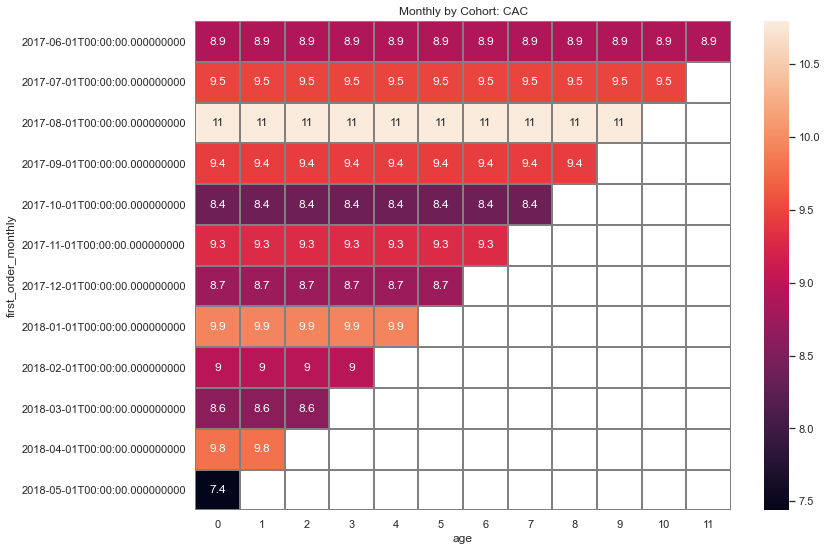

In [74]:
sns.set(style='white')
plt.figure(figsize=(12, 9))
plt.title('Monthly by Cohort: CAC')
sns.heatmap(result_cac_monthly, annot=True, linewidths=1, linecolor='gray')
''

<div class="alert alert-info">How much did customer acquisition from each of the sources cost?

In [75]:
# how much did customer acquisition from each of the sources cost?
data_orders_grouped = data_orders.groupby(['uid'])['revenue'].sum()
data_visits_grouped = data_visits.groupby(['uid'])['source_id'].first()
orders_sources = pd.merge(data_orders_grouped,data_visits_grouped, on='uid',how='inner')
orders_sources_monthly = pd.merge(orders_sources,first_orders_monthly,on='uid',how='inner')
#print(orders_sources_monthly)
orders_sources_monthly.columns = ['uid','revenue','source_id','month']
#print(orders_sources_monthly)
#print(data_costs)

orders_sources_monthly_ = orders_sources_monthly.pivot_table(index='month',columns='source_id',values='uid',aggfunc='count')
data_costs_ = data_costs.pivot_table(index='month',columns='source_id',values='costs',aggfunc='sum')
#print(orders_sources_monthly_)
#print(data_costs_)
cac_months_sources = data_costs_/orders_sources_monthly_
cac_months_sources

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,5.572327,9.057388,13.708599,8.469398,7.089756,2.971042,3.530562
2017-07-01,5.108952,9.332440,17.323634,7.218262,7.648316,4.144384,7.170000
2017-08-01,6.998603,12.154698,20.825559,9.839021,6.622061,2.999157,6.120263
2017-09-01,5.233484,9.853663,15.568047,8.998718,6.670953,4.284742,6.398194
2017-10-01,5.661980,10.031056,15.504670,5.810715,6.262106,3.627440,3.336383
2017-11-01,5.315565,10.289569,16.707890,4.850423,9.701442,3.733224,7.138378
2017-12-01,4.991898,9.795600,14.546655,6.028626,8.044548,3.987758,8.387792
2018-01-01,6.411085,12.448323,17.629500,5.957906,8.366854,4.974182,7.227647
2018-02-01,6.389797,11.963476,14.805994,5.567212,7.649035,4.880531,3.878065


Most expensive buyers are of Sources 3, 2, 4, 5. Less expensive ones come from Sources 1 and 9.

<div class="alert alert-info"> Plot a heatmap.

''

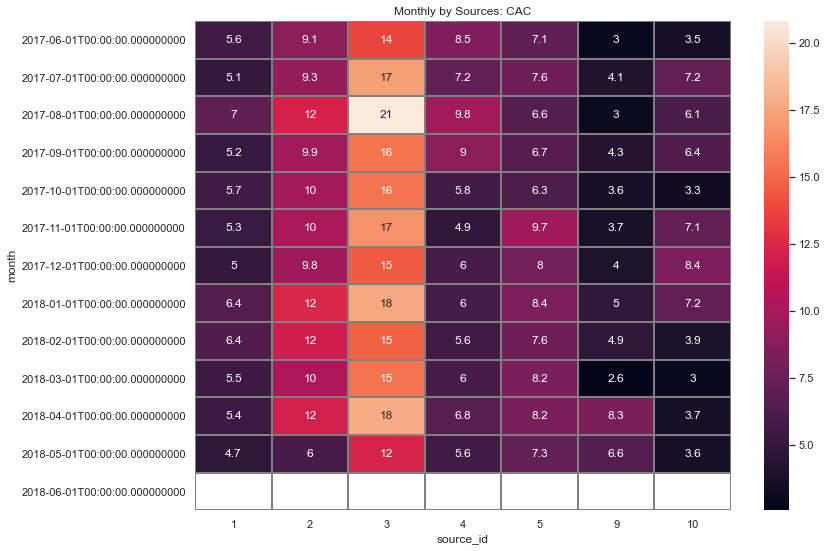

In [76]:
# plot a heatmap
sns.set(style='white')
plt.figure(figsize=(12, 9))
plt.title('Monthly by Sources: CAC')
sns.heatmap(cac_months_sources, annot=True, linewidths=1, linecolor='gray')
''

<div class="alert alert-info">How worthwhile where the investments? (ROI)

In [77]:
# how worthwhile were the investments? (ROMI)
report_['romi'] = report_['ltv'] / report_['cac']
result_romi = report_.pivot_table(
    index='first_order_monthly', 
    columns='age', 
    values='romi', 
    aggfunc='mean')
result_romi = result_romi.cumsum(axis=1).round(2) 
result_romi


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_monthly,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-info">Plot a heatmap.

''

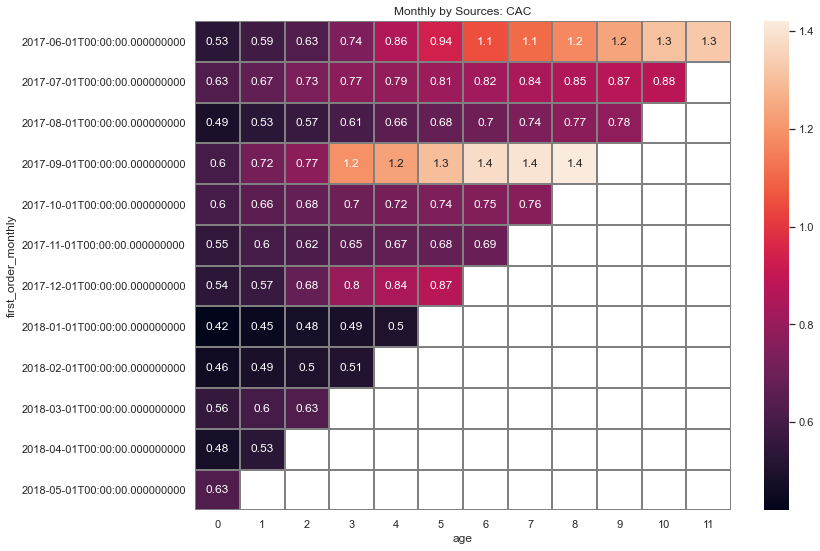

In [78]:
# plot a heatmap
sns.set(style='white')
plt.figure(figsize=(12, 9))
plt.title('Monthly by Sources: CAC')
sns.heatmap(result_romi, annot=True, linewidths=1, linecolor='gray')
''

The June Cohort paid off in the 7th month (ROMI = 1.05). (We start counting at 0.)
The September Cohort paid off in the 4th month (ROMI = 1.19).
There is no more paid off Cohorts.

### Step 3. Write a conclusion: advise marketing experts how much money to invest and where.
What sources/platforms would you recommend? Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?

We download the data and prepare it for the analysis. We remove 2 outliers corresponding to sources 6 and 7 from data on visits as they are statistically insignificant (6 and 36 visits, respectively) and moreover, not represented in data on costs.

On the next step we make reports and calculate metrics.

 We find how many people use it every day, week, and month and plot histograms. From histogram we can see that peak number of customers for Mobile Devices is around 350, and for Desktops peak is about 700 users. So, we can conclude that this app is twice more popular on Desktops.
 
We plot distribution for number of both platform users together for every day. There are some outliers (anomalies) - 1 user for 2018-03-31 (probably just incomplete data, or probably – no activity after Good Friday https://www.calendar-12.com/calendar/2018/march/) and 3319 users for 2017-11-24 (overwhelmed due to Black Friday (Black Friday is the day following Thanksgiving Day). Distribution has peaks around 500 users and 1200 users.

Also to describe the number of active users we find  Sticky DAU = 15.9 and Sticky MAU = 3.9.
We plot bar graph on Number of Users by Weeks. Graph shows gradual growth till week 2017-11-27, having peak value of 10586 users, then number of weekly users starts to decrease.

We plot number of visitors by months. There is a sharp growth from September, 2017 to December, 2017. Then in January, 2018 user number starts to decrease, generally repeating previous (weekly) graph shape. There is a peak of 32796 users during 2017-11-01 week.

We find average number of sessions per day - 987 sessions.

We find the length of each session.
Distributions of Session Length for Mobile Devices and Desktops are generally same. However we can see slightly bigger proportion of Sessions durations around 500 sec for Desktops, then ones for Mobile Devices. Average Session Length for Desktop (773 sec) is about 3 times longer than one for Mobile Devices (240 sec). It looks like users found it more convenient to use the app on Desktop rather than on Mobile Device. That could probably mean the Mobile Version has a room for improvement.

We plot Session Length distribution for all devices. 75% of sessions are under 900 sec, 50% - under 360sec, 25% - under 120sec. Mean session length is 714 sec, median is 360 sec. There are some outliers up to 42660 sec. There are also 35794 records with zero length values.

We find the retention rate and build a partial heatmap. It's highest for the first cohort (2017-05-29) and even grows from time to time. In general, users come back not too often.

We investigate when people start buying. 

We plot bar graph for the first orders distribution by order date. First orders distribution by dates shows some seasonality. We can see increasing number of orders around November and December.

If we assume that registration supposed to come before order, than 145 records are corrupted and needed to drop as Session lenght is negative. If somehow order is possible without any preceding activity, than these records could make sense. Before we get additional info, we disregard these records.

For at least 70% of users the registration and the first purchase occur on the same day, another 5% of users order the next day. Within first 16 days 84% (30322) of all users have already made their first order.

We plot bar graph for orders by cohorts. 25197 users belong to Conversion 0d and 1893 users to Conversion 1d). The number of users making purchases decreases with time passed after first activity. Vast majority of users are making their first order on the registration day (25197 users) and next day (1893 user).

From pivot table and Heatmap on First Order by Cohort and Source we can see that most same day orders come from Sources 4, 3 and 5. Then go Sources 2, 1, 10 and 9. For the next day orders leaders are the same. Sources 4, 3 and 5 actually keep leading throughout the rest elapse times. So Sources 4, 3 and 5 look most effective prior evaluating costs involved.

We find out how many orders do users make during a given period of time. We observe that there are 36080 first orders for a given time (from 2017-06-01 to 2018-06-01).

We investigate the average purchase size. We plot a pivot table on average purchase size by cohorts by sources. It shows that Sources 2, 1 and 5 have the highest average purchase sizes.

We find how much money they bring (LTV). Average LTV increases with the age of cohort from about 5 to about 12. As margin rate is not provided, we apply 1, assuming gross profit is equal to revenue. As soon as actual margin rate will be available our metrics could be easily recalculated. Sources 2, 4 and 3 brought highest amounts of money. Sources 5 and 1 are quite close following. 

We find how much money was spent - overall/per source/over time. Overall cost totaled to 329132.62. Per Source - as follows: 
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49

Over time spending by sources are shown in respective pivot table. No clear patterns identified.

We investigate how much customer acquisition from each of the sources costs. Most expensive buyers are of Sources 3 (13.7), 2 (9.05), 4 (8.47), 5 (7.09). Less expensive ones come from Sources 1 (5.57) and 9 (2.97).

We find how worthwhile where the investments (ROMI). The June Cohort paid off in the 7th month (ROMI = 1.05). (We start counting at 0.) The September Cohort paid off in the 4th month (ROMI = 1.19). There is no more paid off Cohorts so far.



Based on our findings we would recommend focus on Sources 2 and 4 as they provide highest revenue, good number of same day orders and not the highest CAC. Sources 5 and 1 are also quite close. We like Source 3 also, but there is enormous CAC, we would recommend investigating the situation with this particular source before marketing budget allocation. Recommended costs for Source 3 considered reasonable within those values for Source 4 to be effective. 

We also check all the metrics for Mobile Devices and Desktops separately. Unfortunately, costs data provided have no separation for costs for “touch” platform and costs for “desktop” platform. Under these circumstances calculation of important metrics as CAC, ROMI and so on separately by platform is not possible. Data on orders does not have a session id, as well as data on visits, so we, strictly speaking, even could not be sure what platform the order came from. So, analyzing platforms on “Sales” and “Marketing” parameters seem to be very limited. However, we can analyze various platforms in “Product” part. Our findings show that there are 3 times more visits from “desktops” and session duration is 3 times longer for “desktops”. From these results we can conclude that Desktop version is considered convenient by users and working properly as 773 sec (about 13 min) is perfect duration for studying offers, making choice and placing order. Also we can see that less than a quarter of orders come from “touch” platform. It looks like users look through app on “touch” platform at glance and then go to “desktop” to make orders. So we would recommend to support both platforms as Mobile version is a must nowadays and “desktop” is in evident demand among Yandex.Afisha users. 
